# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Star Detection

In [2]:
plt.rcParams["figure.figsize"] = (12, 18)

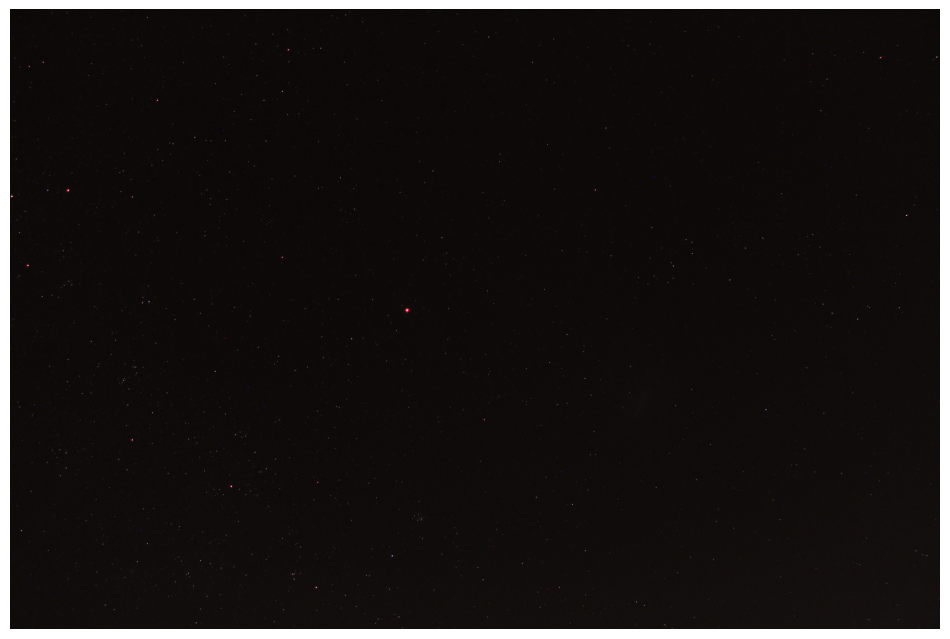

In [3]:
image = cv2.imread("data/stars.jpg")
plt.axis("off")
plt.imshow(image)

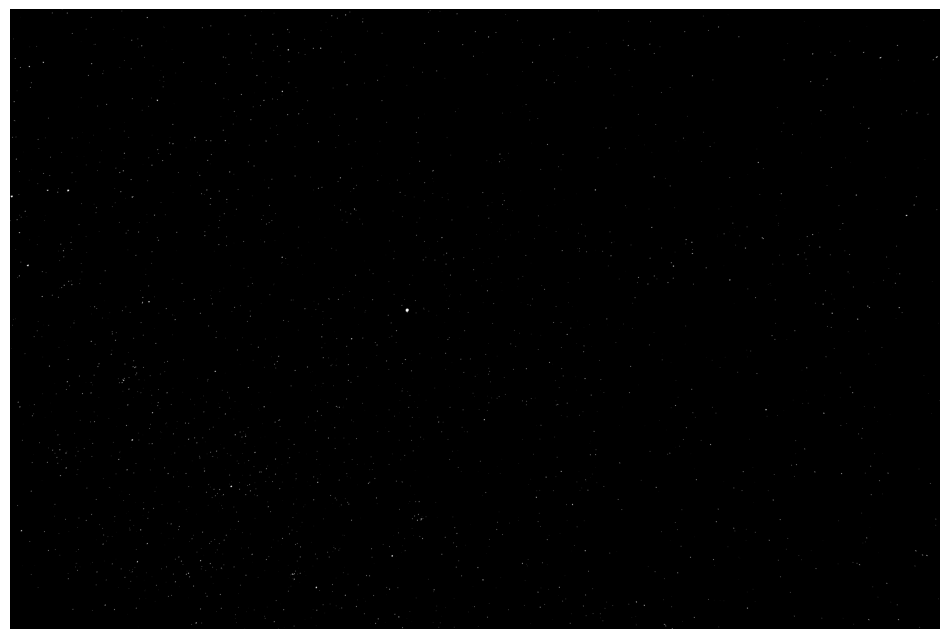

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Threshold the image to create a binary image
ret, binary_image = cv2.threshold(gray_image, 40, 255, 0)
plt.axis("off")
plt.imshow(binary_image, cmap="gray")

## Connected Component Labeling (Blob Extraction)

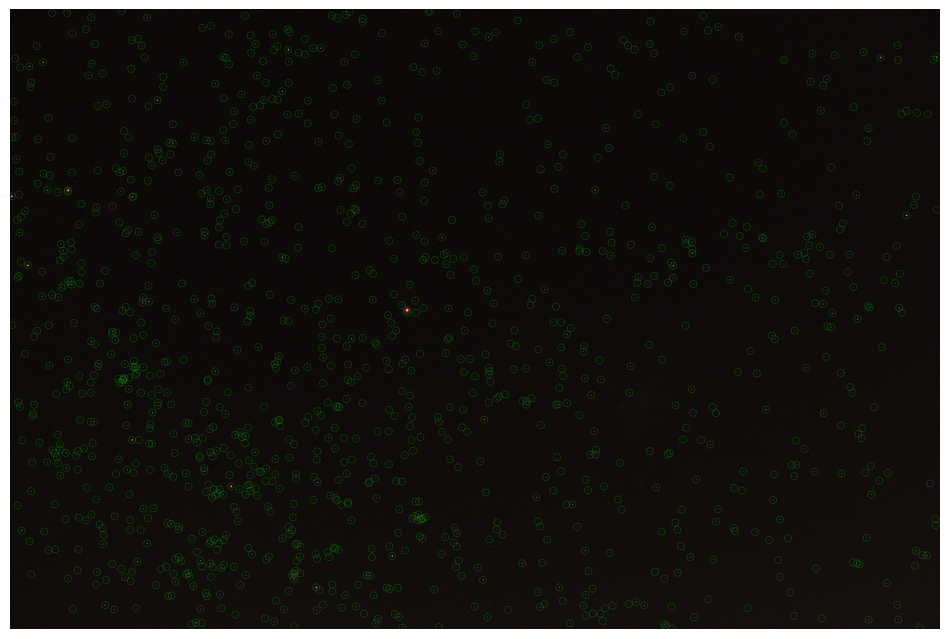

In [5]:
blob_extraction_image = image.copy()

# Detect connected components (blobs) in the binary image
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image)

# Set a minimum size for the blobs to be detected
min_size = 5

# Loop through the detected blobs and draw a circle on the output image
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] > min_size:
        # Get the centroid of the blob
        center = tuple(map(int, centroids[i]))
        # Find the minimum enclosing circle of the blob
        radius, _ = cv2.minEnclosingCircle(np.argwhere(labels == i))
        # Draw the circle on the output image
        blob_extraction_image = cv2.circle(
            blob_extraction_image, center, 20, (0, 255, 0), 1
        )

cv2.imwrite("results/connected_component_star_detection.png", blob_extraction_image)
plt.axis("off")
plt.imshow(blob_extraction_image)

## Hough Transform

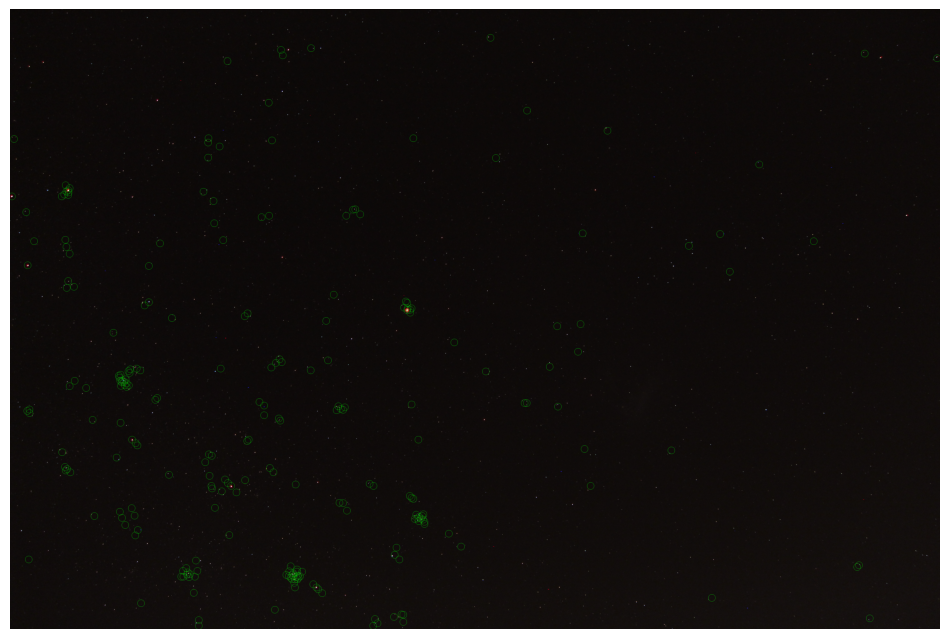

In [6]:
hough_transform_image = image.copy()

circles = cv2.HoughCircles(
    binary_image,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=10,
    param1=100,
    param2=5,
    minRadius=5,
    maxRadius=50,
)

circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    # draw the outer circle
    cv2.circle(hough_transform_image, (i[0], i[1]), 20, (0, 255, 0), 1)

cv2.imwrite("results/hough_transform_star_detection.png", hough_transform_image)
plt.axis("off")
plt.imshow(hough_transform_image)

## Results Comparison

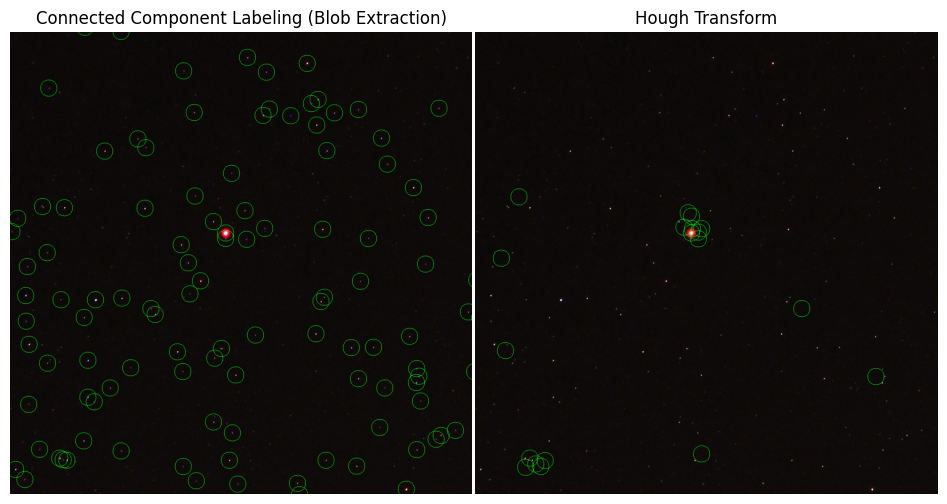

In [7]:
images = [blob_extraction_image, hough_transform_image]
titles = ["Connected Component Labeling (Blob Extraction)", "Hough Transform"]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i, (image, title) in enumerate(zip(images, titles)):
    ax[i].imshow(image[1200:2300, 1700:2800, :])
    ax[i].axis("off")
    ax[i].set_title(title)

plt.subplots_adjust(wspace=0, hspace=0)